<a href="https://colab.research.google.com/github/varunkumarreddi/Iris-Dataset/blob/master/Iris_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working on Iris dataset**

**IMPORTING DATASET AND BASIC LIBRARIES** 

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('https://raw.githubusercontent.com/varunkumarreddi/Iris-Dataset/master/Iris.csv', sep=",")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**CHECKING THE DATA FOR NULL VALUES AND UNDERSTANDING THE DATA** 

In [0]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
df.drop("Id", axis=1, inplace = True)

In [0]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [0]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**BASIC VISUALIZATION**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


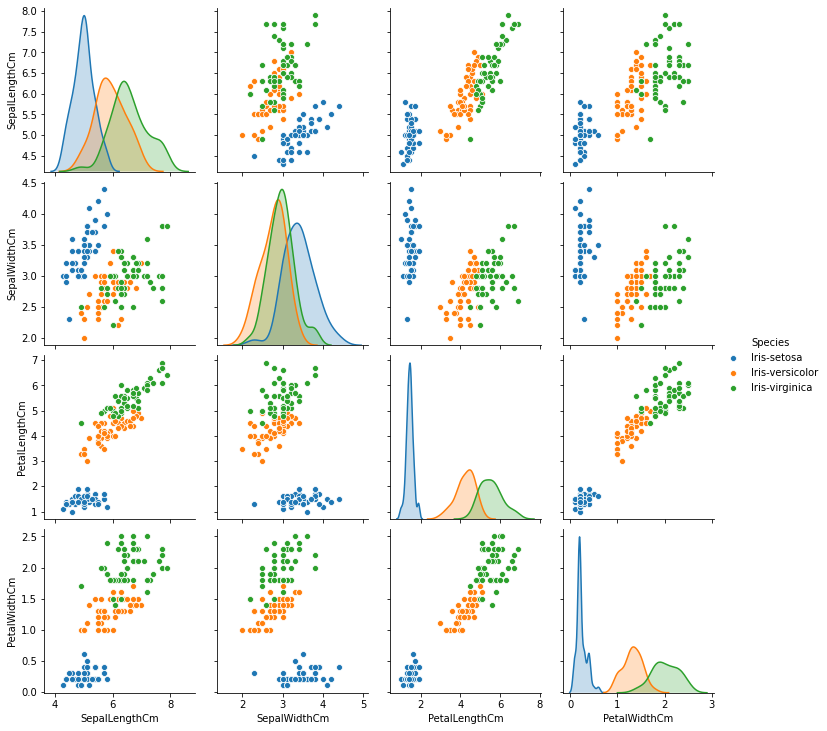

In [0]:

sns.pairplot(df, hue="Species", size=2.5)



**WE CAN SEE THAT PETAL ATTRIBUTES ARE MORE CLASSIFIED THAN SEPAL ATTRIBUTES**

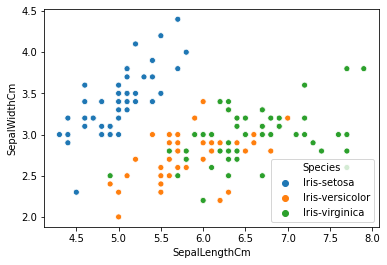

In [0]:
sns.scatterplot('SepalLengthCm','SepalWidthCm',data=df,hue='Species')

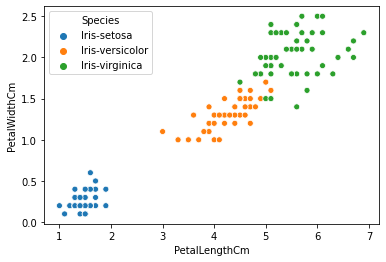

In [0]:
sns.scatterplot('PetalLengthCm','PetalWidthCm',data=df,hue='Species')

In [0]:
cm=df.corr()
cm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


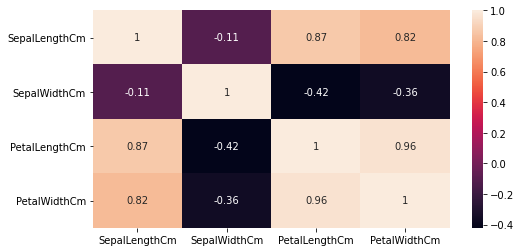

In [0]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True)
plt.show()

**SPLITTING THE DATA INTO TRAIN AND TEST SETS**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Species',axis=1),df['Species'],test_size=0.2)


**BUILDING MODELS AND COMPARING ACCURACY**

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection
from sklearn.metrics import accuracy_score 

In [0]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=3)))
models.append(('SVM',SVC()))
models.append(('NB',GaussianNB()))
models.append(('tree',DecisionTreeClassifier()))



for name, model in models:
 model.fit(x_train,y_train)
 pred=model.predict(x_test)
 print (name,':', accuracy_score(pred,y_test))
 

LR : 0.9666666666666667
KNN : 0.9333333333333333
SVM : 0.9333333333333333
NB : 0.9333333333333333
tree : 0.9333333333333333


**CHECKING BY TAKING ONLY PETAL ATTRIBUTES**

In [0]:
nx_train,nx_test,ny_train,ny_test=train_test_split(df[['PetalLengthCm','PetalWidthCm']],df['Species'],test_size=0.3)

In [0]:
for name, model in models:
 model.fit(nx_train,ny_train)
 pred=model.predict(nx_test)
 print (name,':', accuracy_score(pred,ny_test))


LR : 0.9777777777777777
KNN : 0.9777777777777777
SVM : 0.9777777777777777
NB : 0.9777777777777777
tree : 0.9555555555555556
